<a href="https://colab.research.google.com/github/1Aditya7/DSP15-12-24/blob/main/InsurancePremium_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Project Setup

In [ ]:
# Installing Kaggle to Recieve Dataset
!pip install -q kaggle

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import json
from pickle import dump

# Handling Warnings
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

In [ ]:
# Creating a folder for Kaggle credentials and copy the file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Setting the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Using the Kaggle API to download the dataset (Hidden)
!kaggle competitions download -c playground-series-s4e12

 82% 62.0M/75.5M [00:00<00:00, 222MB/s]
100% 75.5M/75.5M [00:00<00:00, 221MB/s]


In [ ]:
# Unzipping the dataset
!unzip playground-series-s4e12.zip -d dataset

Archive:  playground-series-s4e12.zip
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


In [ ]:
# Checking if the dataset is present
!ls dataset

sample_submission.csv  test.csv  train.csv


## 2. Loading Dataset

In [ ]:
# Load a CSV file into a DataFrame
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
df.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


## 3. Exploratory Data Analysis (EDA)

### 3.1 Overview of The Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

### **Variable Description Table**

| Sl.No | Variable Name         | Description                                                  | Variable Type |
|-------|-----------------------|--------------------------------------------------------------|---------------|
| 1     | Id                    | A unique identifier assigned to each customer or record.     | Float         |
| 2     | Age                   | The age of the customer.                                     | Float         |
| 3     | Gender                | The gender of the customer (e.g., male or female).           | String        |
| 4     | Annual Income         | The yearly income of the customer.                          | Float         |
| 5     | Marital Status        | The marital status of the customer (e.g., single, married).  | String        |
| 6     | Number of Dependents  | The number of people financially dependent on the customer.  | Float         |
| 7     | Education Level       | The highest level of education attained by the customer.     | String        |
| 8     | Occupation            | The profession or job category of the customer.              | String        |
| 9     | Health Score          | A numerical representation of the customer’s health status. | Float         |
| 10    | Location              | The geographical area where the customer resides.            | String        |
| 11    | Policy Type           | The category or type of insurance policy (e.g., health).     | String        |
| 12    | Previous Claims       | The number or details of prior insurance claims.             | Float         |
| 13    | Vehicle Age           | The age of the customer's vehicle (if applicable).           | Float         |
| 14    | Credit Score          | A numerical score representing the customer’s creditworthiness. | Float      |
| 15    | Insurance Duration    | The length of time the customer has been insured.            | Float         |
| 16    | Policy Start Date     | The date when the insurance policy commenced.                | Datetime      |
| 17    | Customer Feedback     | Input or reviews provided by the customer about the services.| String        |
| 18    | Smoking Status        | Indicates whether the customer smokes or not.                | String        |
| 19    | Exercise Frequency    | How often the customer engages in physical exercise.          | String        |
| 20    | Property Type         | The category of property owned (e.g., apartment, house).      | String        |
| 21    | Premium Amount        | The cost paid by the customer for the insurance policy.       | Float         |



In [ ]:
print('The dataframe contains {} rows and has {} features.'.format(len(df), df.shape[1]))

The dataframe contains 1200000 rows and has 21 features.


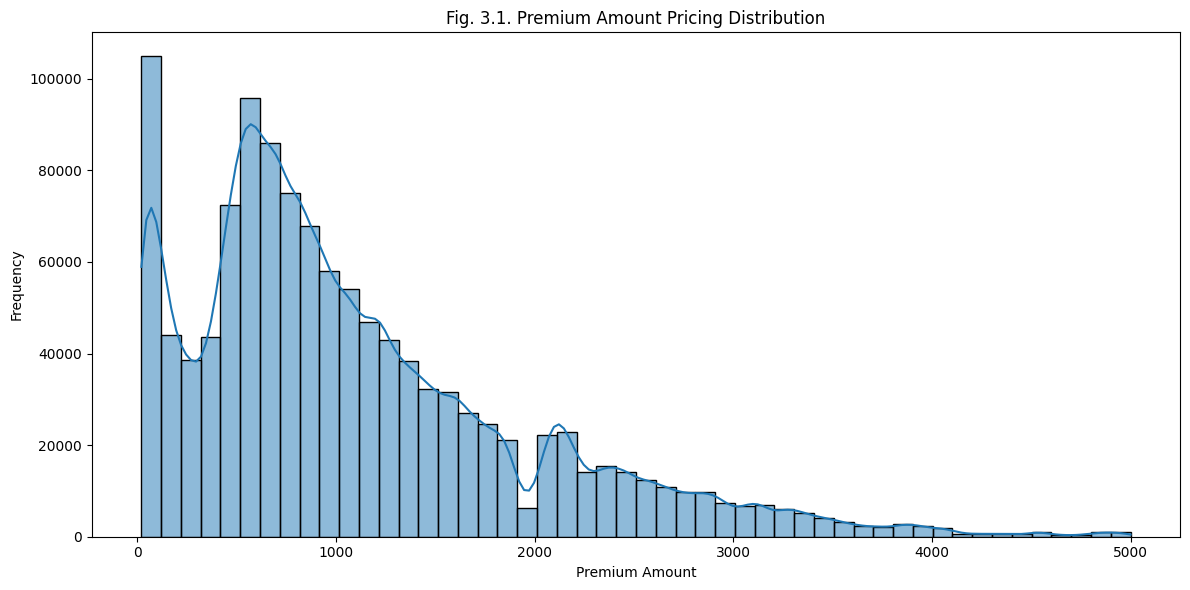

In [ ]:
#Plotting Premium Amount Pricing Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['Premium Amount'], kde=True, bins=50)
plt.title('Fig. 3.1. Premium Amount Pricing Distribution')
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Fig. 3.1. Inferences:**
*   The premium amounts range from approximately 0 to 5000.

*   The histogram appears to be right-skewed, meaning there are a larger number of policies with lower premium amounts and a smaller number with higher premium amounts. This is a common practice in insurance pricing, where a majority of policies are priced lower to cater to the general population.

*   The distribution tails off gradually towards the higher premium amounts.






### 3.2 Identifying  Duplicate and Null Values

In [ ]:
# Checking for Duplicated Values
print(f'Number of duplicated values: {df.duplicated().sum()}')

Number of duplicated values: 0


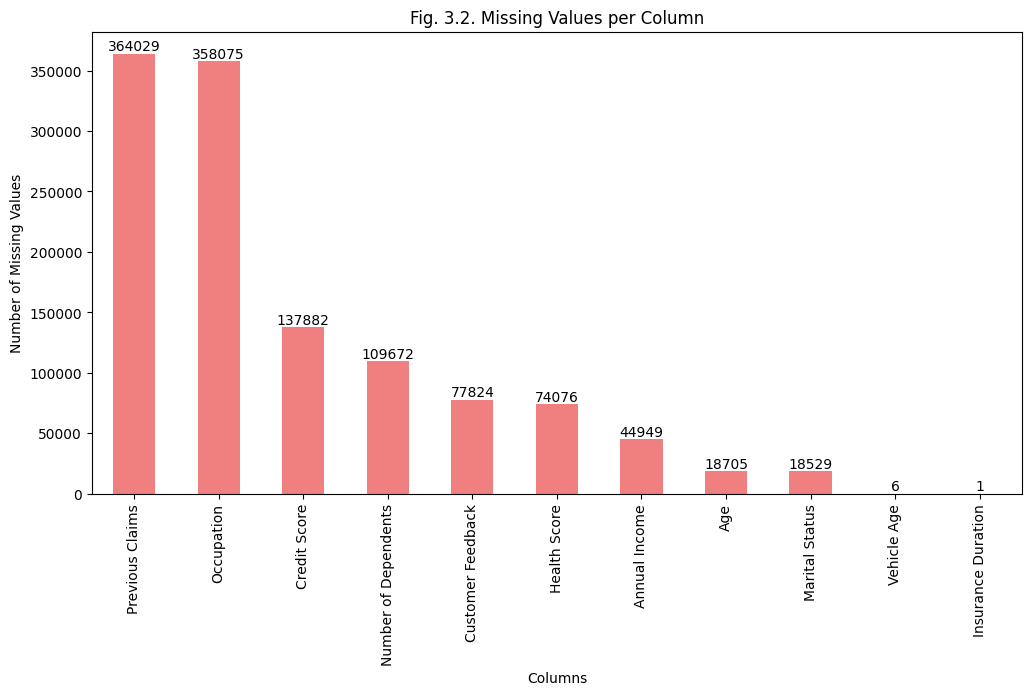

In [ ]:
# Checking for Null Values

# Count missing values by column
missing_values = df.isna().sum()

# Plot the missing values
plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Fig. 3.2. Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Add annotations on the bars
for i, v in enumerate(missing_values[missing_values > 0].sort_values(ascending=False)):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.show()


**Fig. 3.2. Inferences:**


*   The column `Previous Claims` stands out as a significant outlier with a very high number of missing values.

*   The high number of missing values in certain columns could indicate data quality issues, such as incomplete data collection or data entry errors. These columns may need careful imputations.

* Columns such as `Id`, `Premium Amount`, and `Policy Type` do not appear in the plot therefore they have no missing values, which indicates they can be used reliably without additional preprocessing.



### 3.3 Handling Null Values

In [ ]:
# Simple process of filling null values
df['Marital Status'].fillna('Unknown', inplace=True)
df['Occupation'].fillna('Unknown', inplace=True)
df['Previous Claims'].fillna(0, inplace=True)
df['Vehicle Age'].fillna(df['Vehicle Age'].median(), inplace=True)
df['Insurance Duration'].fillna(df['Insurance Duration'].median(), inplace=True)
df['Customer Feedback'].fillna('No Feedback', inplace=True)

In [ ]:
# Filling 'Age' null values using groupings
age_gcols = ['Gender', 'Occupation', 'Marital Status']
df['Age'] = df.groupby(age_gcols)['Age'].transform(lambda x: x.fillna(x.median()))

**Intuition:** Grouping by `Gender`, `Occupation`, and `Marital Status` helps capture meaningful demographic patterns where individuals with similar attributes are likely to have comparable age distributions. This ensures that missing values in `Age` are filled using contextually relevant medians rather than a context free median.

In [ ]:
# Filling 'Health Score' null values using groupings
health_gcols = ['Age', 'Gender', 'Smoking Status', 'Exercise Frequency']
df['Health Score'] = df.groupby(health_gcols)['Health Score'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Filling 'Number of Dependents' null values using groupings
dependents_gcols = ['Age', 'Gender', 'Location', 'Marital Status', 'Education Level', 'Occupation', 'Property Type']
df['Number of Dependents'] = df.groupby(dependents_gcols)['Number of Dependents'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# (Again) Filling 'Number of Dependents' null values using groupings -> reducing groups
dependents_gcols2 = ['Age', 'Gender', 'Marital Status', 'Education Level', 'Property Type']
df['Number of Dependents'] = df.groupby(dependents_gcols2)['Number of Dependents'].transform(lambda x: x.fillna(x.median()).astype(int))

In [ ]:
# Filling 'Credit Score' null values using groupings
credit_gcols = ['Age', 'Education Level', 'Occupation', 'Marital Status', 'Policy Type']
df['Credit Score'] = df.groupby(credit_gcols)['Credit Score'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# (Again) Filling 'Credit Score' null values using groupings -> reducing groups
credit_gcols2 = ['Age', 'Education Level', 'Occupation', 'Policy Type']
df['Credit Score'] = df.groupby(credit_gcols2)['Credit Score'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Filling 'Annual Income' null values using groupings
income_gcols = ['Age', 'Education Level', 'Occupation', 'Policy Type']
df['Annual Income'] = df.groupby(income_gcols)['Annual Income'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Checking for null values again
print("Null Values are:")
print(df.isna().sum()[df.isna().sum()>0])

Null Values are:
Series([], dtype: int64)


## 4. Numerical and Categorical Features Analysis

### 4.1 Dividing Dataset into Numerical and Categorical Types

In [ ]:
# Checking how many type of features we have
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [ ]:
# Dividing our dataframe by numerical and categorical features
num = ['float64', 'int64']
cat = ['O']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

### 4.2 Categorical Variable Analysis

In [ ]:
# cat_features = df_cat.columns

# cols = 2
# rows = math.ceil(len(cat_features) / cols)
# fig, axes = plt.subplots(rows, cols, figsize=(15, (rows*4)), squeeze=False)

# for ax, feature in zip(axes.flat, cat_features):
#     sns.countplot(ax=ax, data=df_cat, x=feature, hue=feature, palette='Set2')
#     if ax.legend_:
#         ax.legend_.remove()
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
#     ax.set_title(feature)

# for ax in axes.flat[len(cat_features):]:
#     ax.set_visible(False)

# plt.tight_layout()
# plt.show()

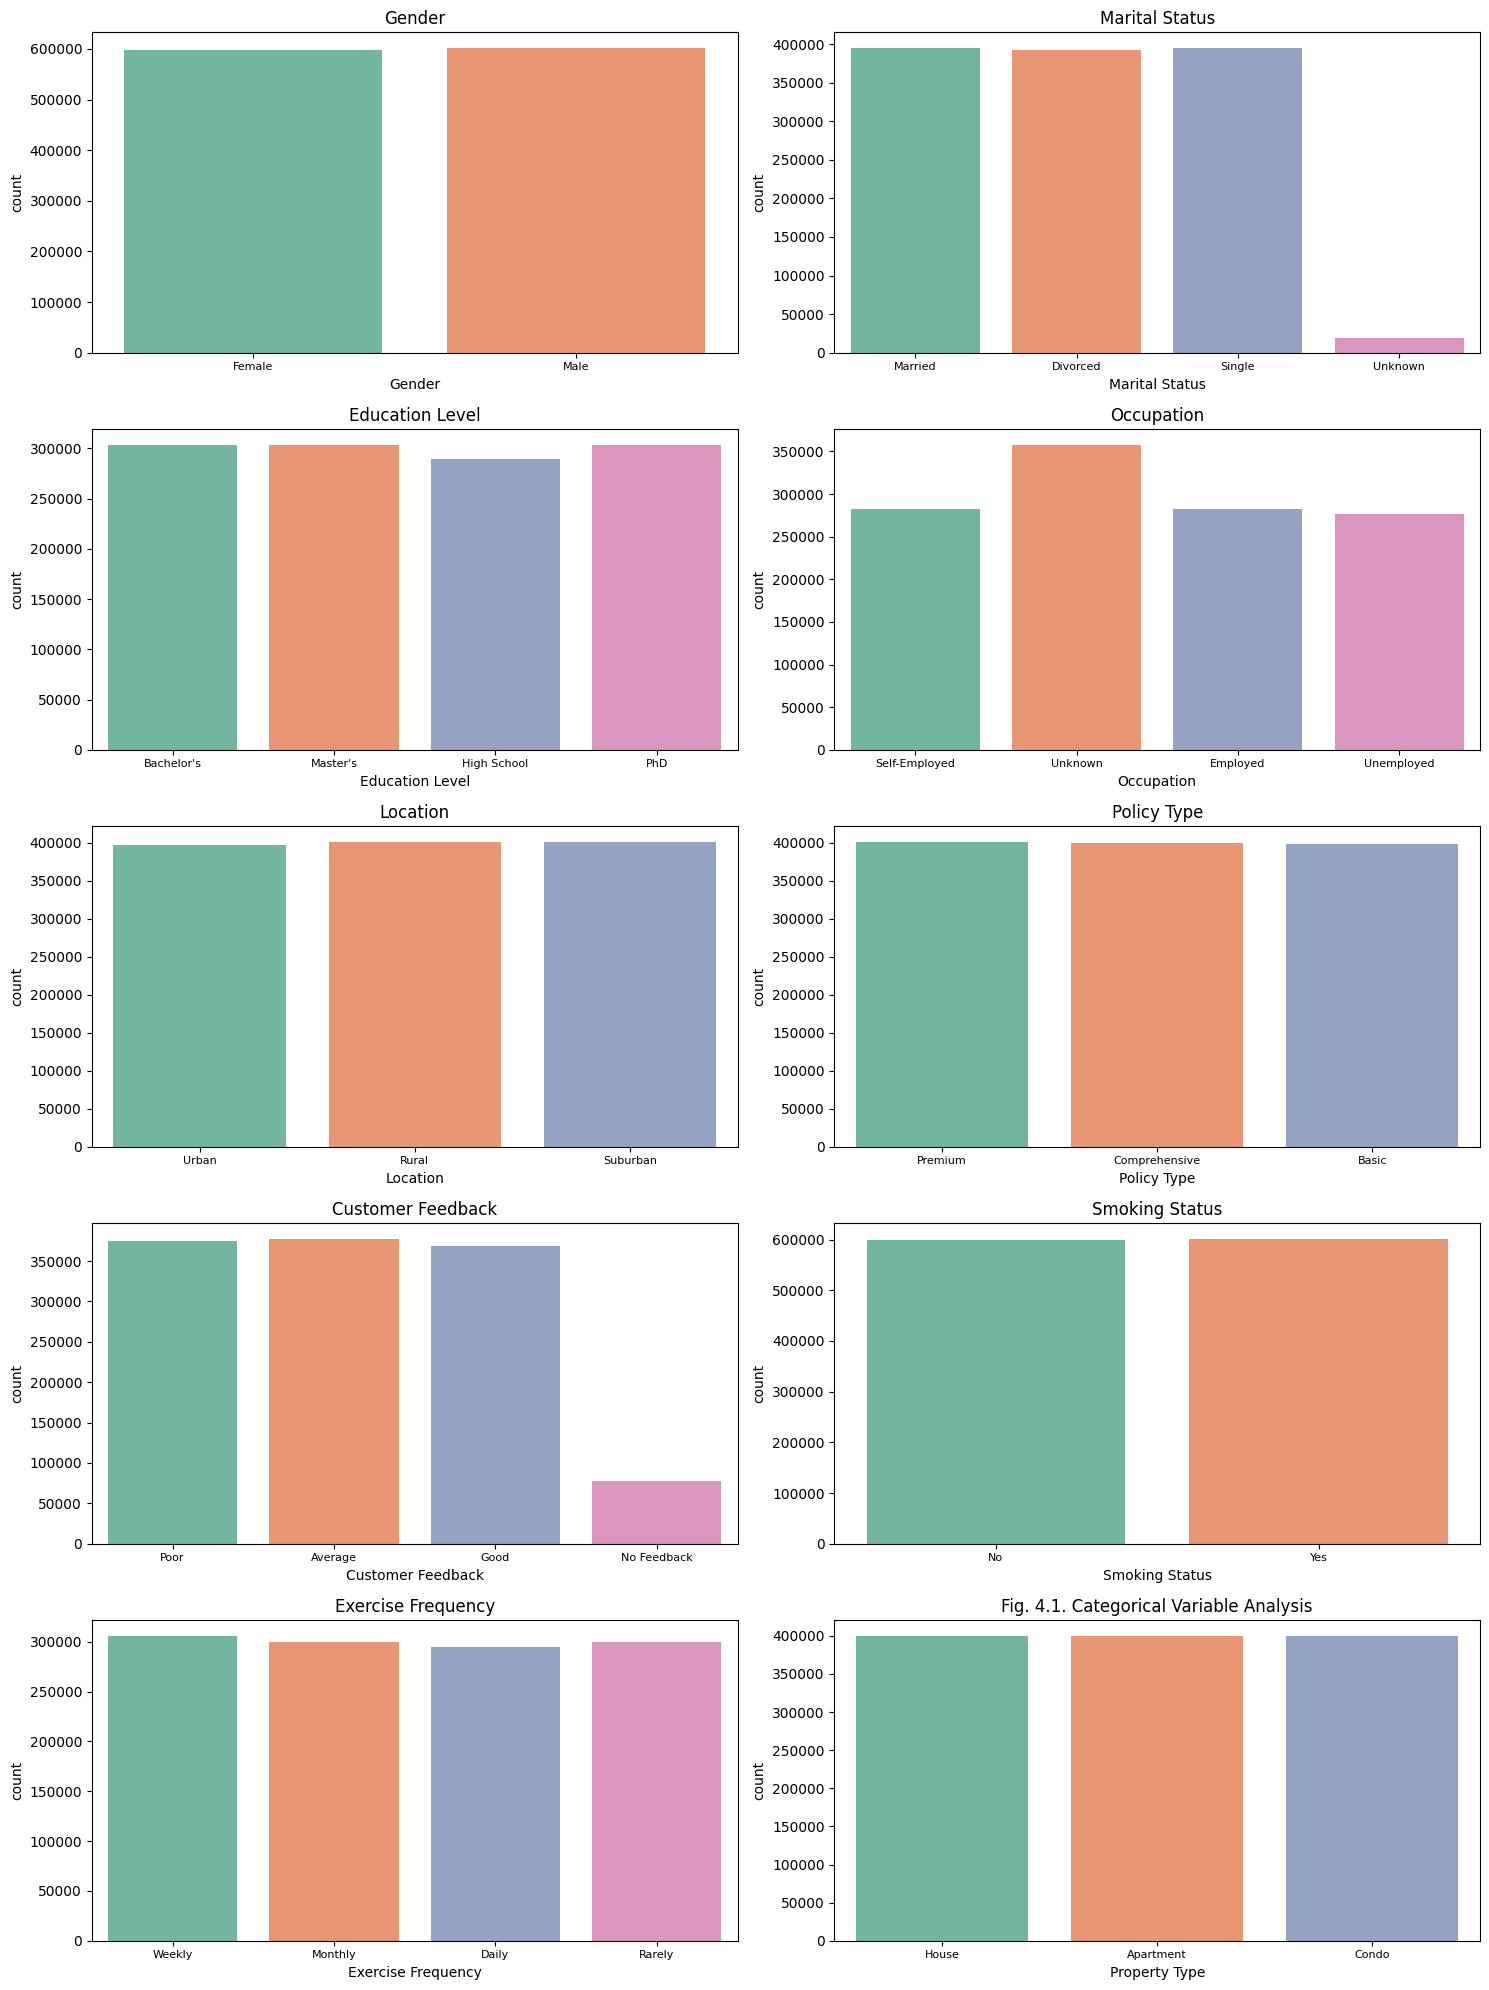

In [ ]:
# List of categorical features excluding 'Policy Start Date'
cat_features = ['Gender', 'Marital Status', 'Education Level', 'Occupation',
                'Location', 'Policy Type', 'Customer Feedback',
                'Smoking Status', 'Exercise Frequency', 'Property Type']

# Create subplots
cols = 2
rows = math.ceil(len(cat_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, (rows * 4)), squeeze=False)

for ax, feature in zip(axes.flat, cat_features):
    sns.countplot(ax=ax, data=df_cat, x=feature, hue=feature, palette='Set2')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
    ax.set_title(feature)

for ax in axes.flat[len(cat_features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.title('Fig. 4.1. Categorical Variable Analysis')
plt.show()


### 4.3 Numerical Variable Analysis

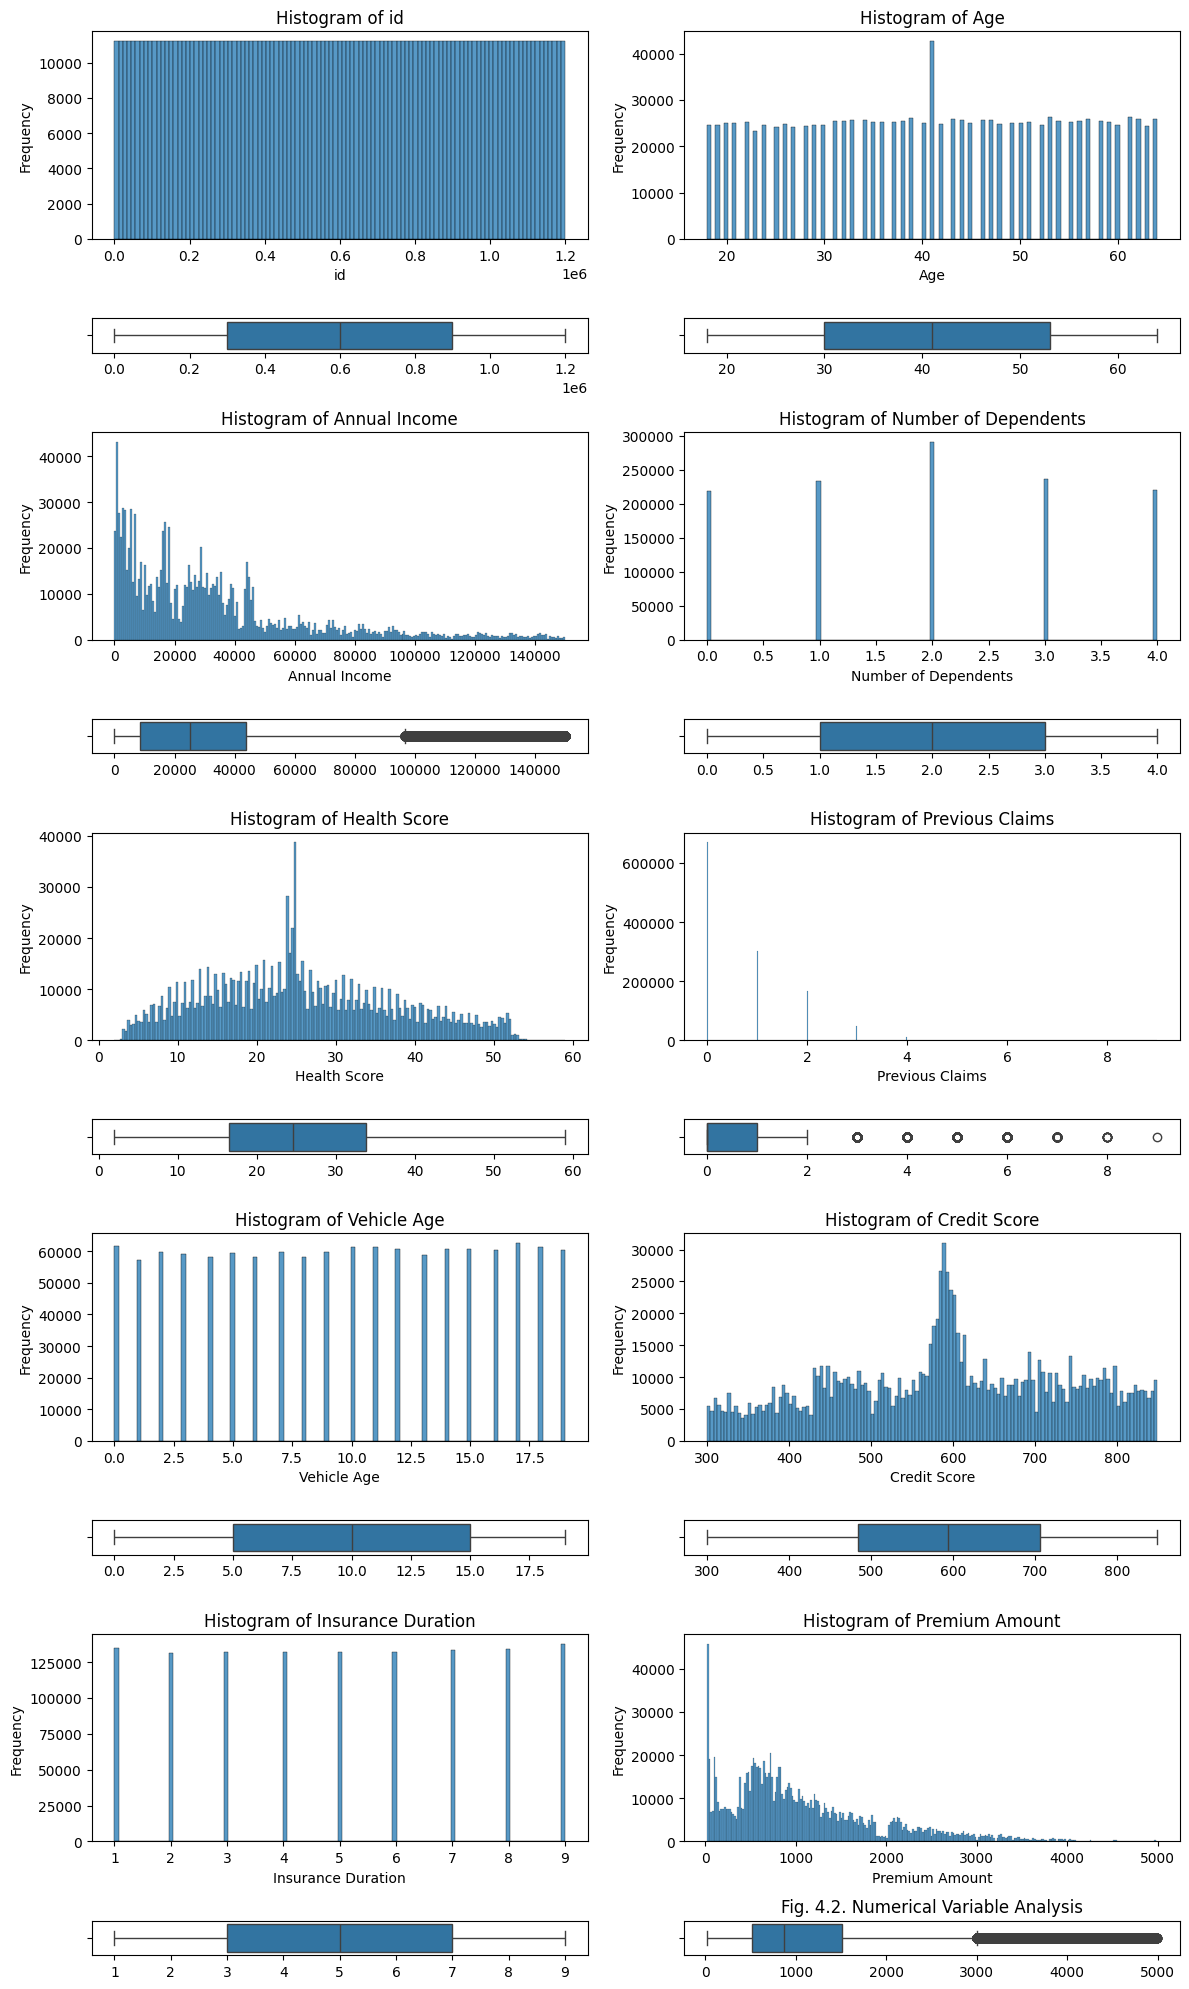

In [ ]:
num_features = df_num.columns
n_cols = 2
n_rows = math.ceil(len(num_features) / n_cols)

fig, ax = plt.subplots(n_rows * 2, n_cols, figsize=(12, n_rows * 4), gridspec_kw={'height_ratios': [6, 1] * n_rows})
if n_rows == 1:
    ax = ax.reshape(-1, n_cols)

for i, feature in enumerate(num_features):
    col = i % n_cols
    row = i // n_cols
    sns.histplot(ax=ax[row * 2, col], data=df_num, x=feature, palette='Set2').set(ylabel='Frequency', title=f"Histogram of {feature}")
    sns.boxplot(ax=ax[row * 2 + 1, col], data=df_num, x=feature).set(xlabel=None, ylabel='')

for row in range(n_rows * 2):
    for col in range(n_cols):
        if row // 2 * n_cols + col >= len(num_features):
            ax[row, col].set_visible(False)

plt.tight_layout()
plt.title('Fig. 4.2. Numerical Variable Analysis')
plt.show()

In [ ]:
# Create a copy of the original DataFrame
df_enc = df.copy()

# Encode categorical columns directly
for column in df_cat.columns:
    unique_values = list(df_cat[column].unique())
    encoding_dict = dict(zip(unique_values, range(len(unique_values))))

    # Replace the categorical values with the encoded numerical values
    df_enc[column] = df_enc[column].map(encoding_dict)

# Show the first 3 rows of the encoded DataFrame
df_enc.head(3)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,0,10049.0,0,1,0,0,22.598761,0,0,2.0,17.0,372.00000,5.0,0,0,0,0,0,2869.0
1,1,39.0,0,31678.0,1,3,1,1,15.569731,1,1,1.0,12.0,694.00000,2.0,1,1,1,1,0,1483.0
2,2,23.0,1,25602.0,1,3,2,0,47.177549,2,0,1.0,14.0,619.80303,3.0,2,2,1,0,0,567.0


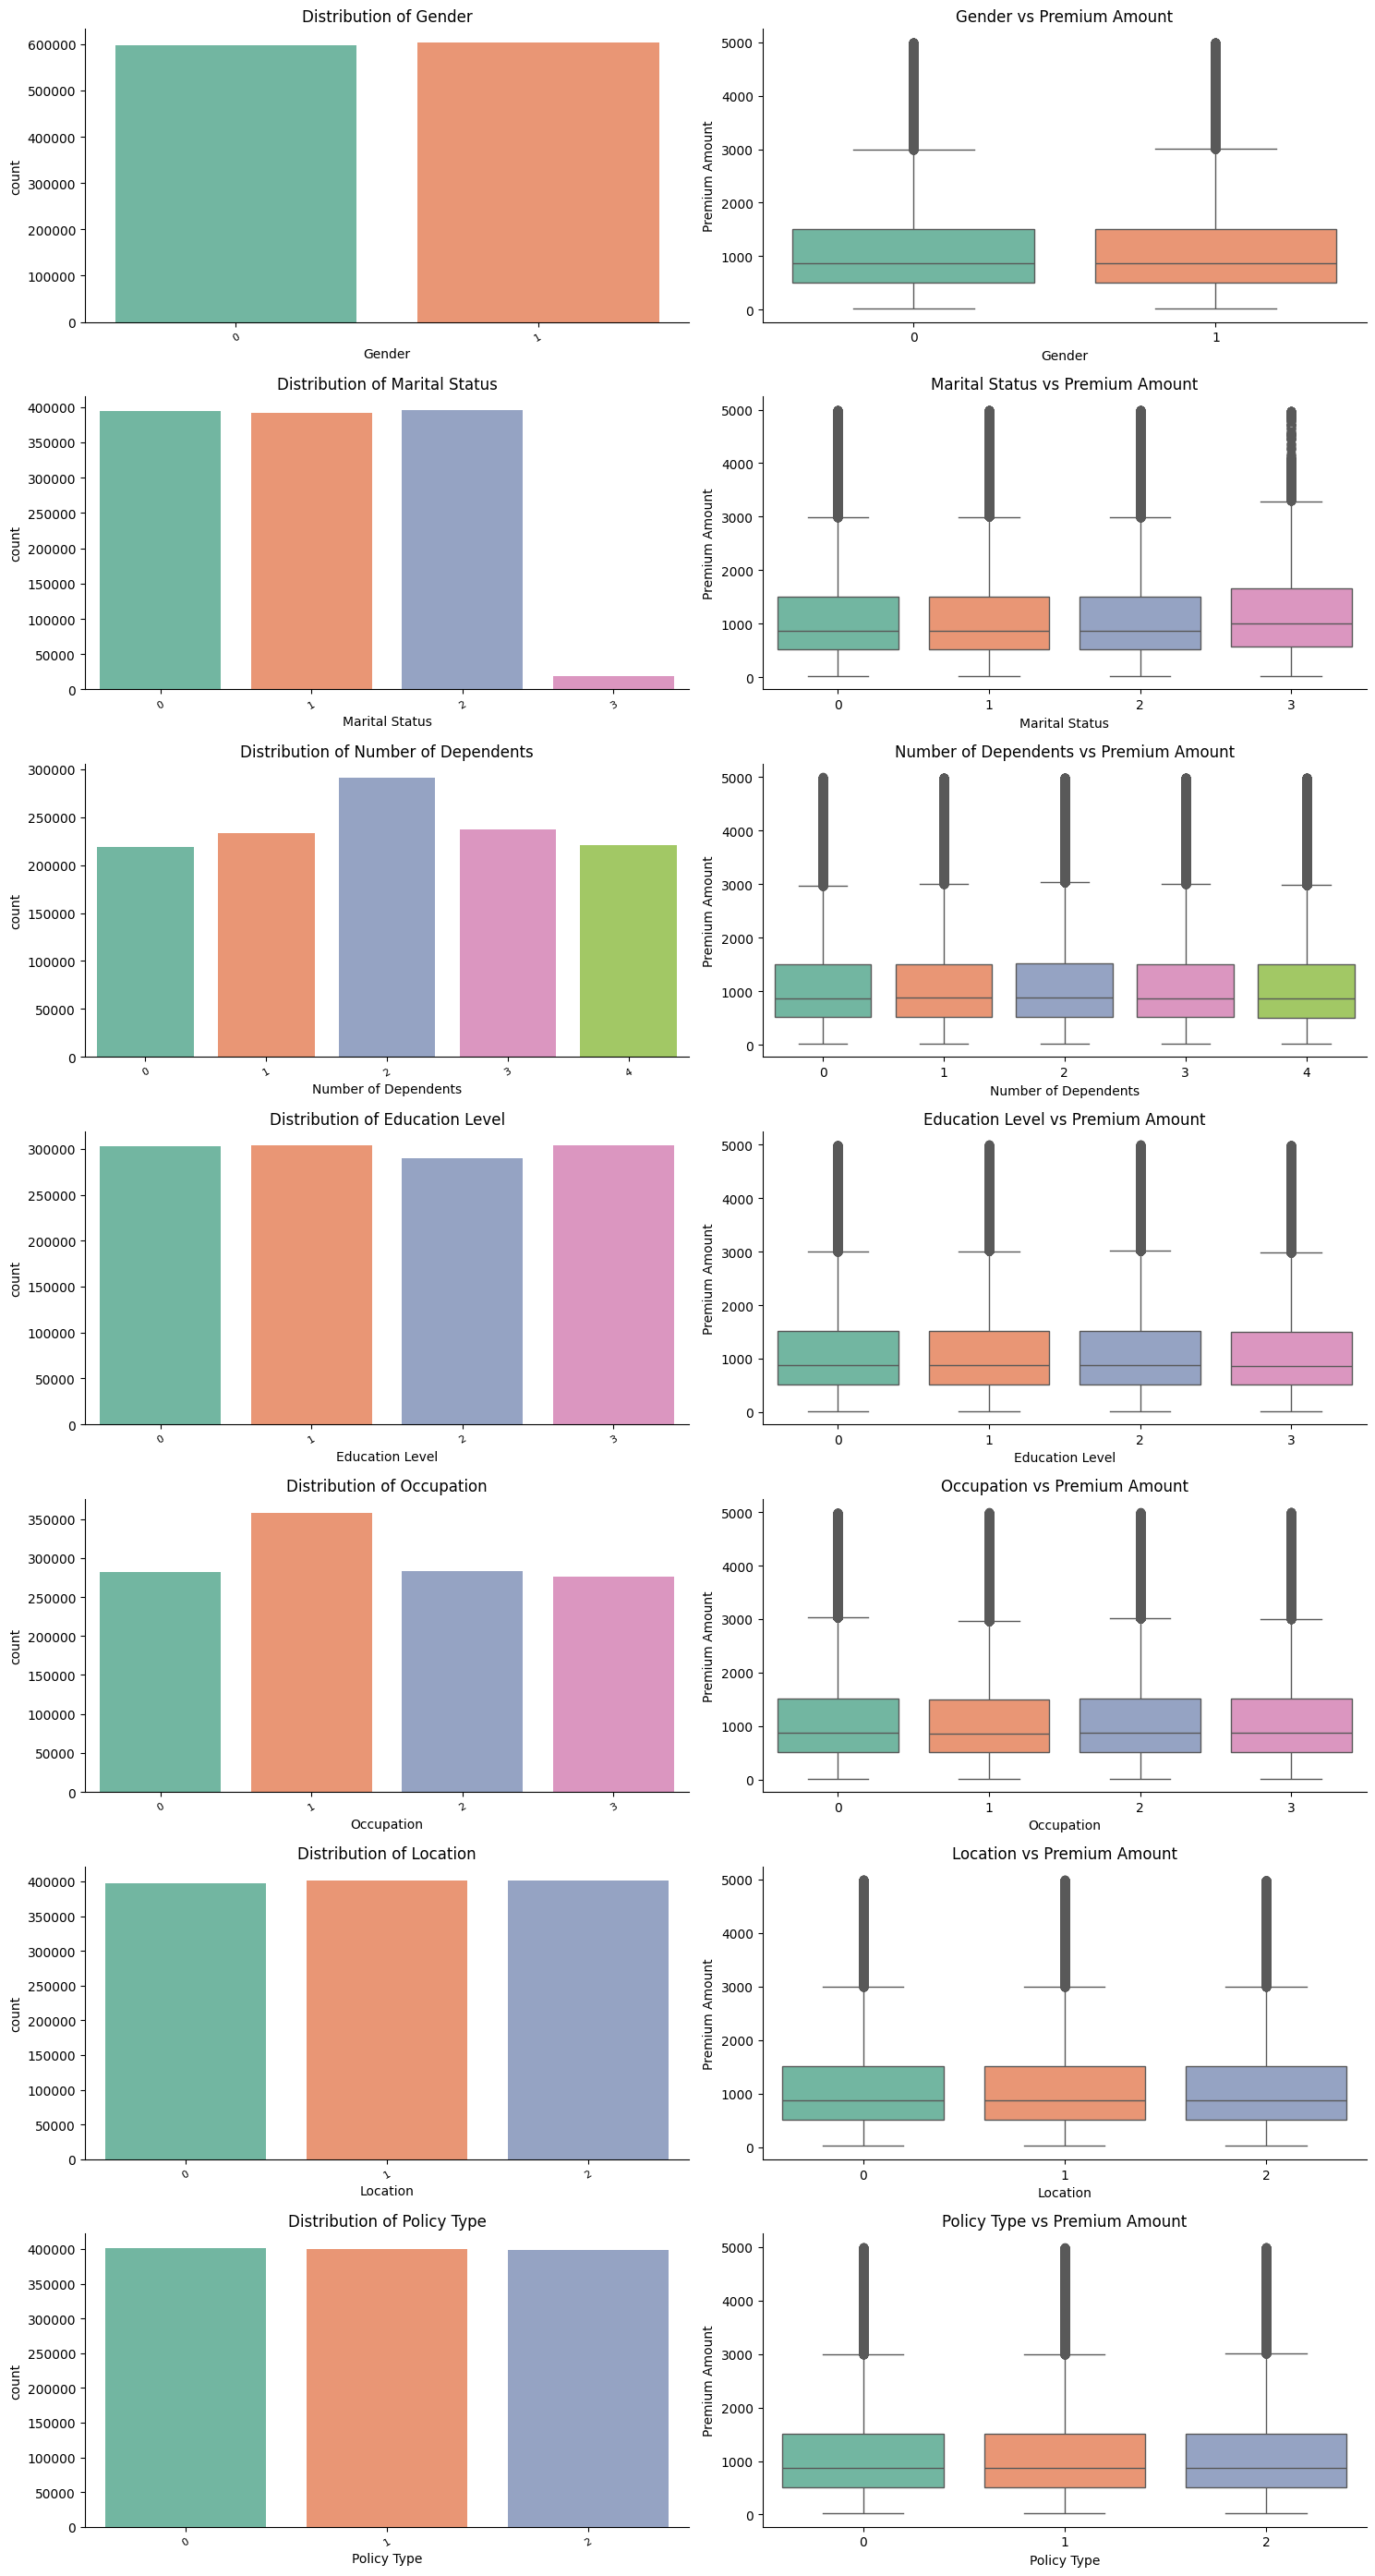

In [ ]:
features = [feature for feature in df_enc.columns if feature != 'Policy Start Date']
target = 'Premium Amount'

max_categories = 25
features = [feature for feature in features if df_enc[feature].nunique() <= max_categories]

rows = math.ceil(len(features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4), squeeze=False)
axes = axes.flatten()

for i, feature in enumerate(features):
    try:
        sns.countplot(ax=axes[i * 2], data=df_enc, x=feature, palette='Set2')
        axes[i * 2].set_title(f'Distribution of {feature}', fontsize=12)
        axes[i * 2].set_xticklabels(axes[i * 2].get_xticklabels(), fontsize=8, rotation=30)
        sns.despine(ax=axes[i * 2])

        sns.boxplot(ax=axes[i * 2 + 1], data=df_enc, x=feature, y=target, palette='Set2')
        axes[i * 2 + 1].set_title(f'{feature} vs {target}', fontsize=12)
        sns.despine(ax=axes[i * 2 + 1])
    except Exception as e:
        continue

for ax in axes[len(features) * 2:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

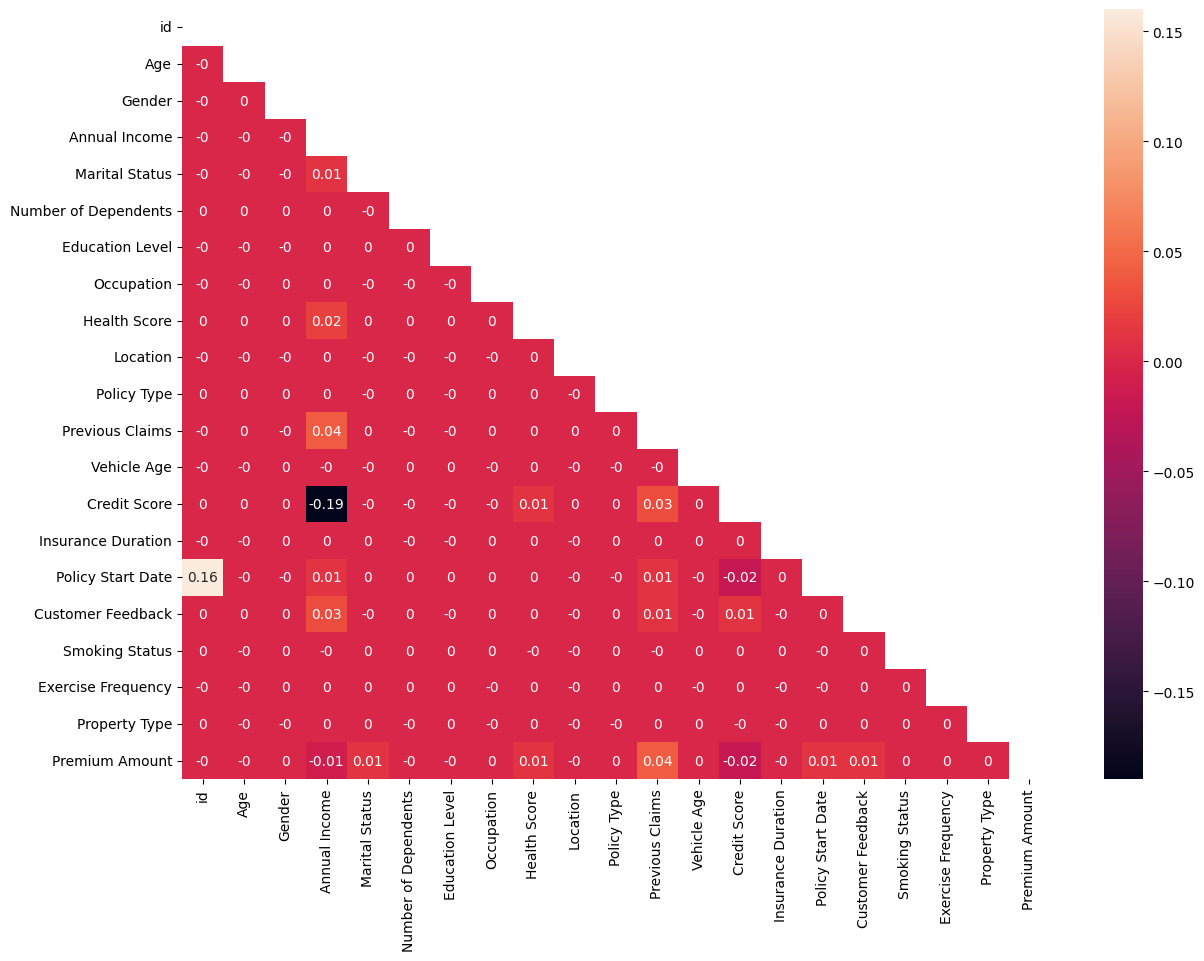

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df_enc.corr().round(2), annot=True, mask=np.triu(df_enc.corr()))
plt.show()

In [ ]:
print(df.columns)

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Premium Amount', 'Year', 'Month', 'Day'],
      dtype='object')


## 5. Feature Engineering

In [ ]:
# def date_transformation(data):
#     data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
#     data['Year'] = data['Policy Start Date'].dt.year
#     data['Month'] = data['Policy Start Date'].dt.month
#     data['Day'] = data['Policy Start Date'].dt.day
#     data.drop('Policy Start Date', axis=1, inplace=True)
#     return data


# df = date_transformation(df)
# test = date_transformation(test)

In [ ]:
def date_transformation(data):
    data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
    data.drop('Policy Start Date', axis=1, inplace=True)
    return data

df = date_transformation(df)
test = date_transformation(test)

KeyError: 'Policy Start Date'

In [ ]:
tar_col ='Premium Amount';

In [ ]:
X = df.drop(columns=[tar_col, 'id' , 'Year', 'Month', 'Day'])
y = df[tar_col]

In [ ]:
num_features = num_features.drop(['id','Premium Amount'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_log_error

xgb_model = xgb.XGBRegressor(eval_metric='rmsle', tree_method='hist')

In [ ]:
# Hyper Parameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [ ]:
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2, n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, error_score='raise')

In [ ]:
# Fit the grid search
# grid_search.fit(X_train, y_train)

# Access the best parameters
# print("Best Parameters: ", grid_search.best_params_)

In [ ]:
best_parameter =  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}

In [ ]:
# Convert object columns to 'category' dtype
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

In [ ]:
# Initialize XGBRegressor with enable_categorical=True
xgb_mb = XGBRegressor(
    **best_parameter,
    enable_categorical=True,  # Ensure this is set
    tree_method='hist'        # Compatible with categorical support
)

# Fit the model
xgb_mb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on validation set
y_pred = xgb_mb.predict(X_val)

In [ ]:
# Print the first 10 predictions
print("Predicted Values (First 10):", y_pred[:10])

Predicted Values (First 10):/n [1143.7183  1182.931   1144.9664  1017.31146 1194.7709  1254.8271
 1127.6656  1317.609    960.4302  1033.8518 ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import numpy as np

# Calculate error metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
msle = mean_squared_log_error(y_val, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Log Error (MSLE): {msle}")


Mean Absolute Error (MAE): 644.6581928457896
Root Mean Squared Error (RMSE): 844.9677428598966
Mean Squared Log Error (MSLE): 1.3254268166572591


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_val, y_pred)

print(f"R-squared (R²): {r2}")

R-squared (R²): 0.04458148299554365


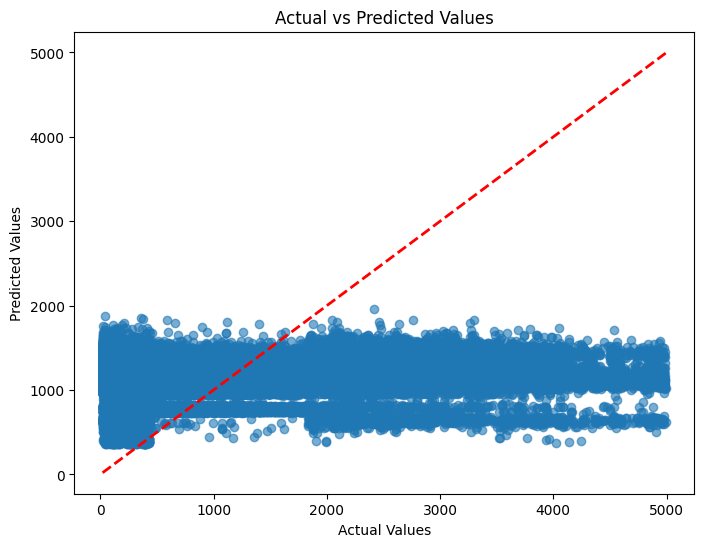

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


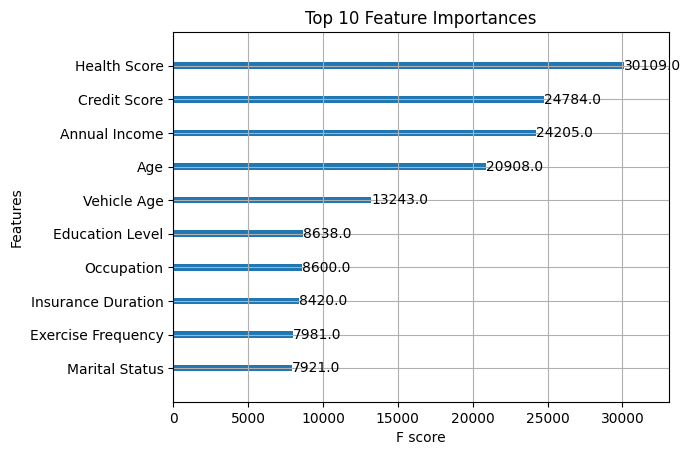

In [ ]:
from xgboost import plot_importance

# Plot feature importances
plot_importance(xgb_mb, max_num_features=10, importance_type='weight')
plt.title("Top 10 Feature Importances")
plt.show()


In [ ]:
# Ensure categorical columns in the test set are of 'category' dtype
for col in test_processed.select_dtypes(include=['object']).columns:
    test_processed[col] = test_processed[col].astype('category')

# Drop unnecessary columns if they exist
columns_to_drop = ['id', 'Policy Start Date']
X_test = test_processed.drop(columns=[col for col in columns_to_drop if col in test_processed.columns])

# Align test set features with training set features
X_test = X_test[X_train.columns]

# Predict on the test set
test_preds = xgb_mb.predict(X_test)

# Save predictions to CSV
submission = pd.DataFrame({'id': test['id'], 'Predicted Premium Amount': test_preds})
submission.to_csv("submission.csv", index=False)


In [ ]:
# Display the submission file
print("Preview of submission.csv:")
print(submission.head(20))

Preview of submission.csv:
         id  Predicted Premium Amount
0   1200000               1695.536255
1   1200001               1191.974121
2   1200002               1192.967285
3   1200003               1258.474121
4   1200004               1125.551758
5   1200005               1142.633057
6   1200006               1236.468506
7   1200007               1212.632202
8   1200008                628.681763
9   1200009               1115.951904
10  1200010               1219.371460
11  1200011               1125.946899
12  1200012               1316.570923
13  1200013               1063.306641
14  1200014               1133.542236
15  1200015               1231.620972
16  1200016               1165.333130
17  1200017                691.474182
18  1200018               1200.479492
19  1200019               1165.421143


In [ ]:
# Polynomial features for numerical columns to capture non-linear relationships.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)


ValueError: could not convert string to float: 'Male'